In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
df= pd.read_csv(r'https://raw.githubusercontent.com/cagomezv/Mineria_de_Datos/refs/heads/main/5.Clasificacion/Data/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#viewing shape of dataset
df.shape

(569, 33)

In [ ]:
#viewing column names
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#To get statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
df1= df.drop(['id'], axis=1)
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [101]:
#M, malignant: 1, Cancerous
#B, benign: 0, Not Cancerous
df1['diagnosis'] = df1['diagnosis'].replace({'M': 1, 'B': 0}).astype(int)

<Axes: >

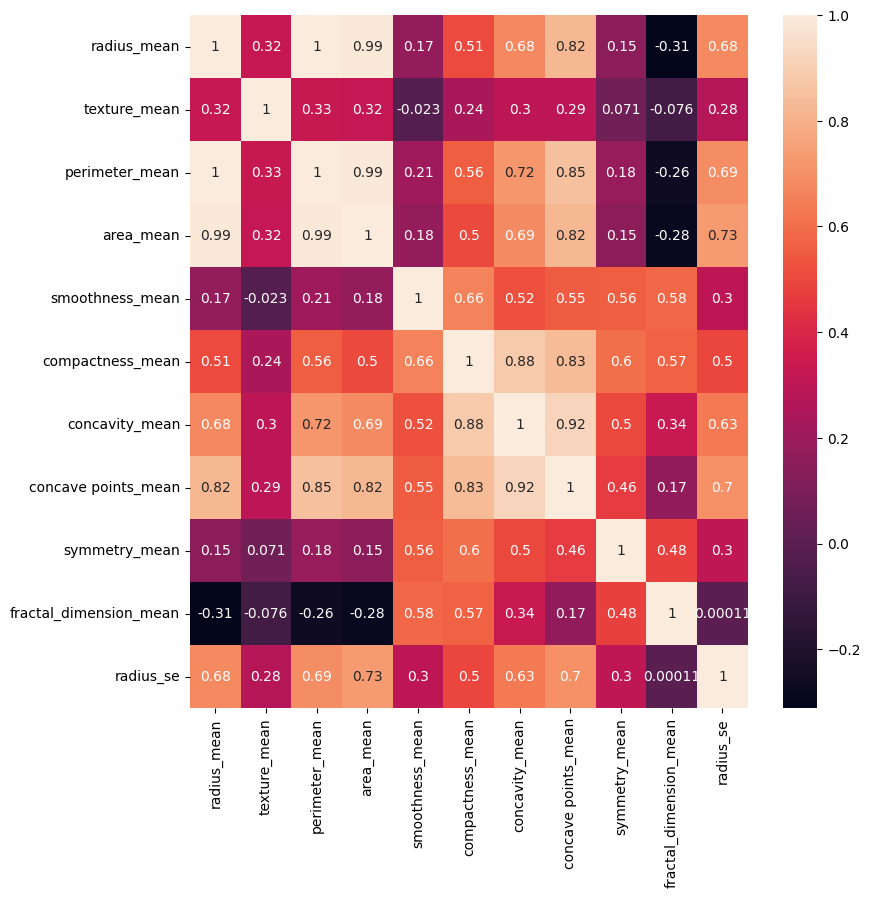

In [102]:
plt.figure(figsize=(9,9))
sns.heatmap(df1.iloc[:,1:12].corr(),yticklabels=True,annot=True)

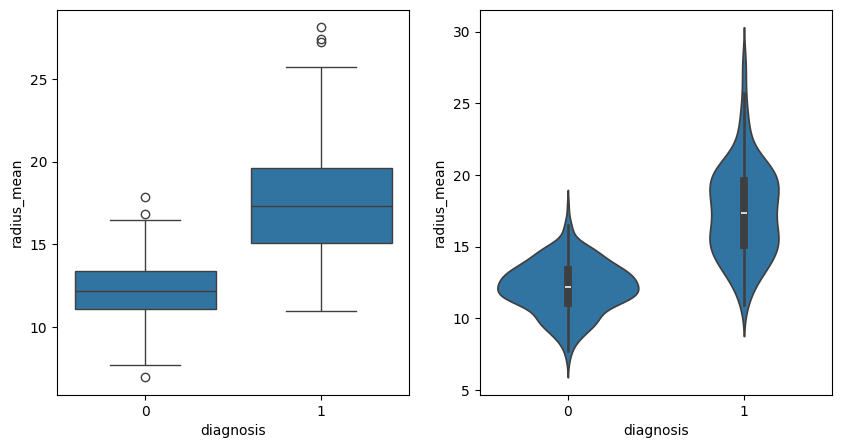

In [103]:
# Plotting correlation between diagnosis and radius
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=df1)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="radius_mean", data=df1)
plt.show()

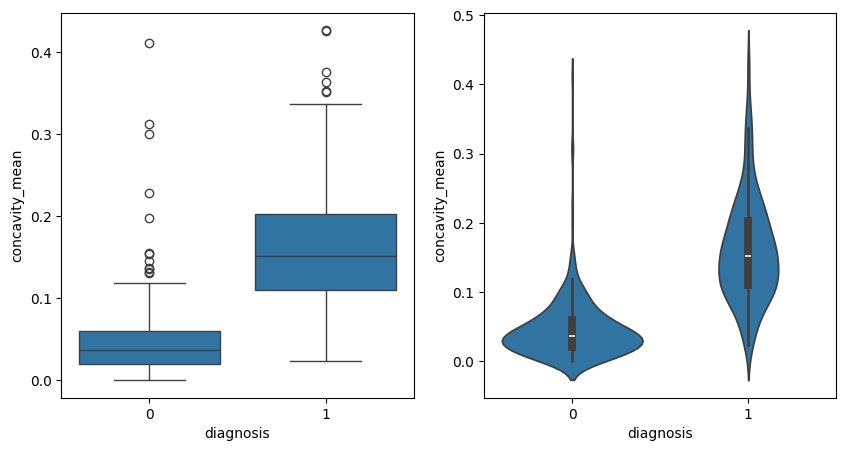

In [104]:
# Plotting correlation between diagnosis and concativity

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="concavity_mean", data=df1)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="concavity_mean", data=df1)
plt.show()

In [106]:
import plotly.figure_factory as ff
import plotly.offline as py

# divide into 2 datasets
M = df1[(df1['diagnosis'] != 0)]
B = df1[(df1['diagnosis'] == 0)]
# feature distribution (histogram + kernel density estimation)
def plot_distribution(data_select, size_bin) :
    tmp1 = M[data_select]
    tmp2 = B[data_select]
    #plot multiple data sets on the same plot
    hist_data = [tmp1, tmp2]

    group_labels = ['malignant', 'benign']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')

    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')


In [107]:
plot_distribution('radius_mean', .5)
plot_distribution('texture_mean', .5)
plot_distribution('perimeter_mean', 5)
plot_distribution('area_mean', 10)
plot_distribution('smoothness_mean', .5)
plot_distribution('compactness_mean', .5)
plot_distribution('concavity_mean', .5)
plot_distribution('concave points_mean', .5)
plot_distribution('symmetry_mean', .5)
plot_distribution('fractal_dimension_mean', .5)

In [108]:
plot_distribution('radius_se', .1)
plot_distribution('texture_se', .1)
plot_distribution('perimeter_se', .5)
plot_distribution('area_se', 5)
plot_distribution('smoothness_se', .5)
plot_distribution('compactness_se', .5)
plot_distribution('concavity_se', .5)
plot_distribution('concave points_se', .5)
plot_distribution('symmetry_se', .5)
plot_distribution('fractal_dimension_se', .5)

In [109]:
plot_distribution('radius_worst', .5)
plot_distribution('texture_worst', .5)
plot_distribution('perimeter_worst', 5)
plot_distribution('area_worst', 10)
plot_distribution('smoothness_worst', .5)
plot_distribution('compactness_worst', .5)
plot_distribution('concavity_worst', .5)
plot_distribution('concave points_worst', .5)
plot_distribution('symmetry_worst', .5)
plot_distribution('fractal_dimension_worst', .5)

In [110]:
df1.isnull().any()

,0
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False
symmetry_mean,False


In [111]:
# Replacing the 0 values from ['concavity_mean,concave points_mean,concavity_se,concave points_se'] by NaN
df_copy = df1.copy(deep=True)
df_copy[['concavity_mean','concave points_mean','concavity_se','concave points_se']] = df_copy[['concavity_mean','concave points_mean','concavity_se','concave points_se']].replace(0,np.nan)
df_copy.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,13
concave points_mean,13
symmetry_mean,0


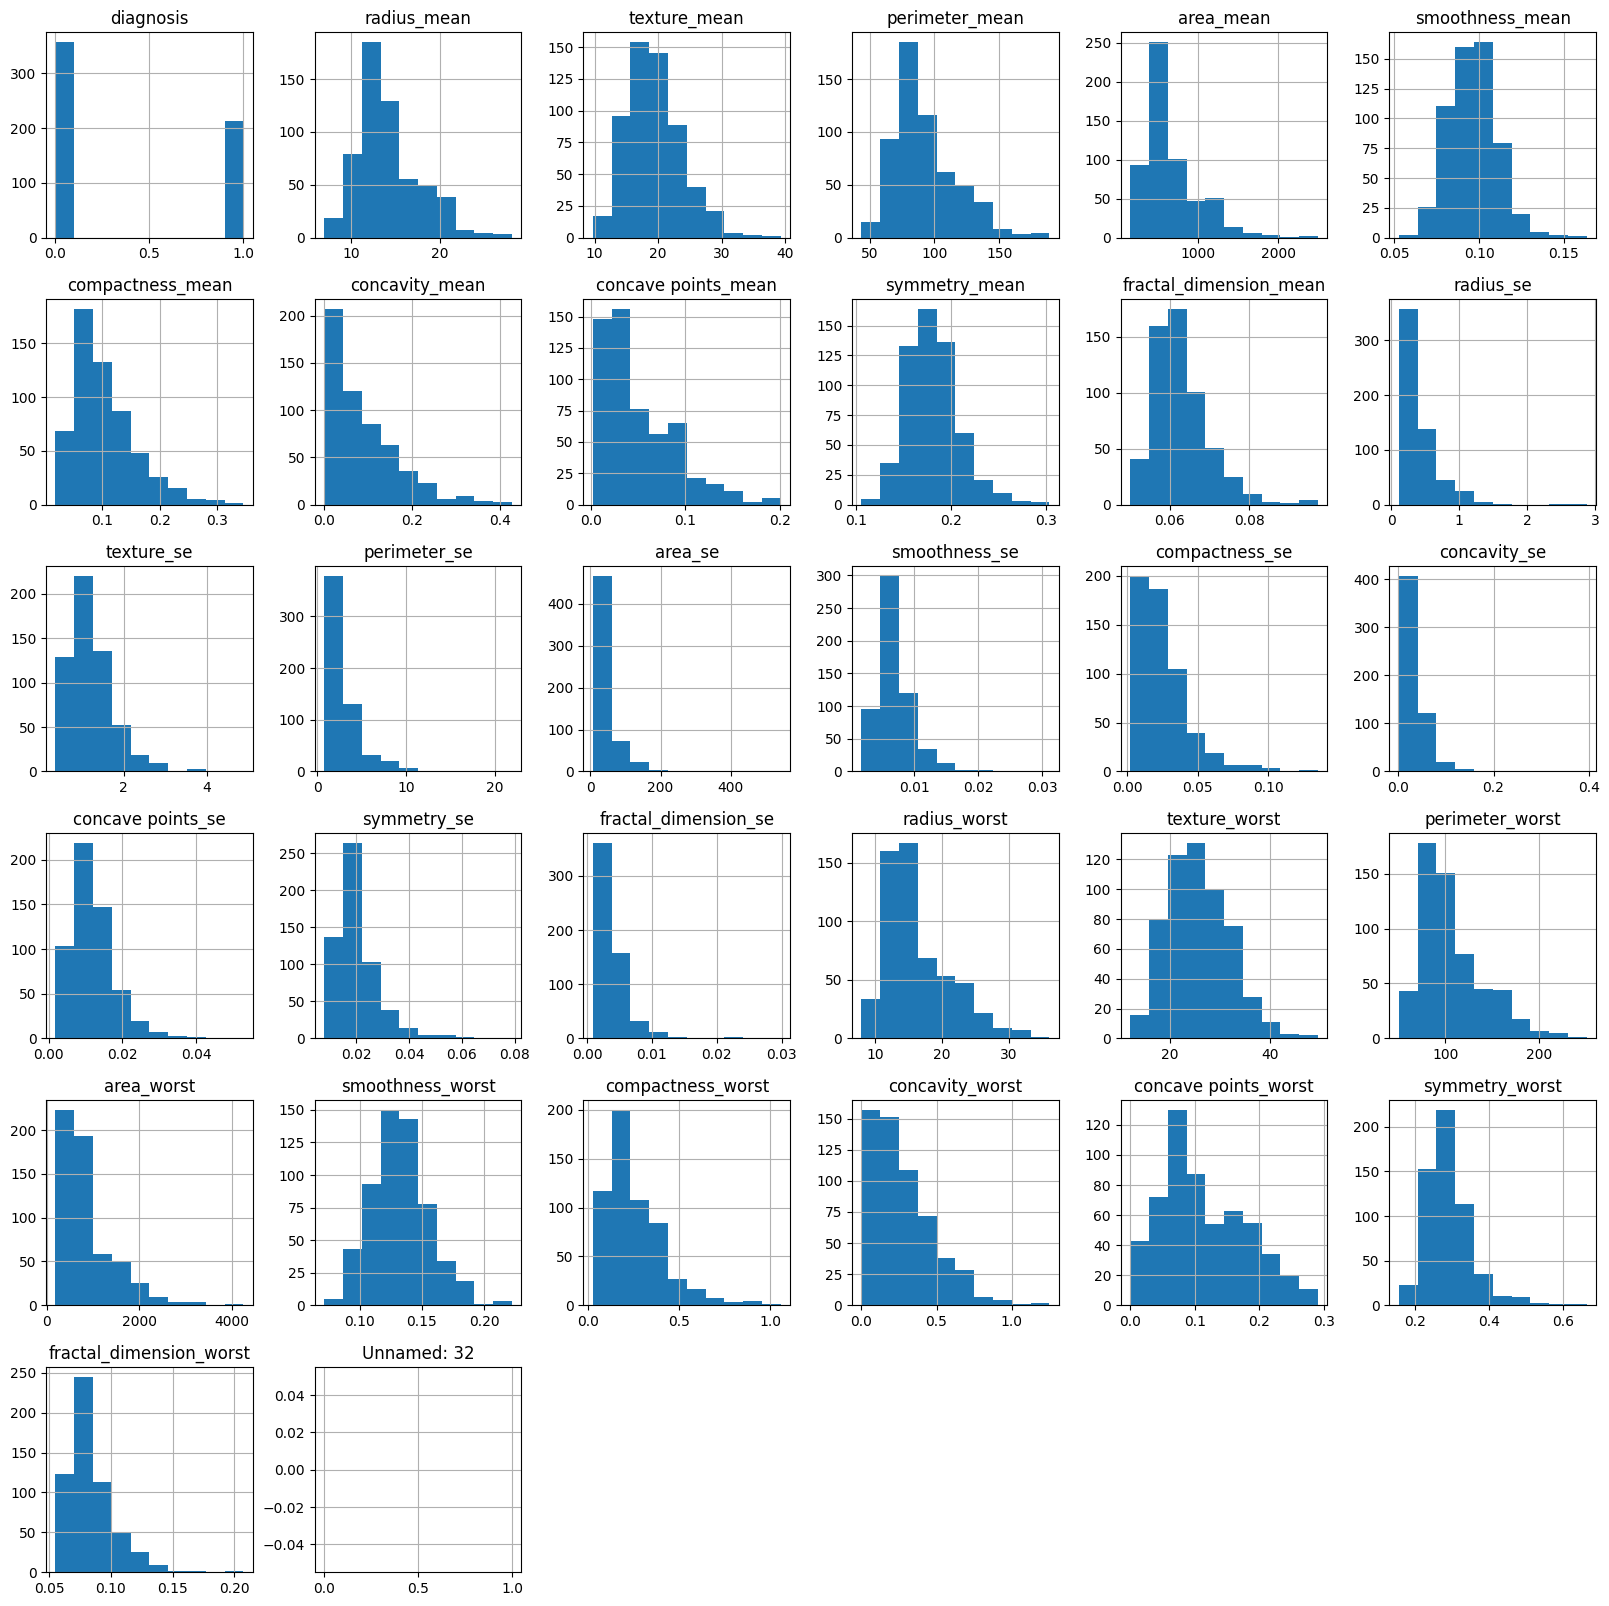

In [112]:
#plotting histogram
p = df_copy.hist(figsize=(20,20))

In [113]:
# Replacing NaN value by median (asymmetric distribution)
df_copy['concavity_mean'] = df_copy['concavity_mean'].fillna(df_copy['concavity_mean'].median())
df_copy['concave points_mean'] = df_copy['concave points_mean'].fillna(df_copy['concave points_mean'].median())
df_copy['concavity_se'] = df_copy['concavity_se'].fillna(df_copy['concavity_se'].median())
df_copy['concave points_se'] = df_copy['concave points_se'].fillna(df_copy['concave points_se'].median())

In [ ]:
df_copy.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [119]:
df_copy = df_copy.drop(columns=['Unnamed: 32'])
#splitting the dataset
X= df_copy.drop('diagnosis', axis= 1)
y= df_copy.diagnosis

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 100)

In [122]:
# Si X_train es un NumPy array
print("Hay NaNs en X_train:", np.isnan(X_train).any())
print("Hay infs en X_train:", np.isinf(X_train).any())

# Revisar columnas con varianza cero
if isinstance(X_train, np.ndarray):
    variances = X_train.var(axis=0)
else:  # Si es un DataFrame
    variances = X_train.var()

print("Columnas con varianza cero:", np.where(variances == 0)[0])

Hay NaNs en X_train: radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_wors

In [123]:
# Revisión rápida
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

# Eliminar columnas con varianza cero
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold=0.0)
X_train = vt.fit_transform(X_train)
X_test = vt.transform(X_test)

# Escalamiento
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
# Feature Scaling (normalizing range of data)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
# Finding the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model_data = []
listOfModels = [LogisticRegression(), KNeighborsClassifier(), SVC(), GradientBoostingClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]

for model in listOfModels:
    classifier = model
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    model_data.append([model.__class__.__name__, accuracy_score(y_test, y_pred)])

model_data_frame = pd.DataFrame(columns=["Model", "Accuracy_Score"], data=model_data)
print(model_data_frame.sort_values("Accuracy_Score"))


                        Model  Accuracy_Score
1        KNeighborsClassifier        0.947368
4      DecisionTreeClassifier        0.947368
3  GradientBoostingClassifier        0.964912
2                         SVC        0.964912
5      RandomForestClassifier        0.964912
0          LogisticRegression        0.973684


# Logistic Regression

In [126]:
# Definir el modelo base
lor = LogisticRegression(max_iter=5000)

# Espacio de búsqueda compatible
param_grid = {
    'solver': ['lbfgs', 'newton-cg'],  # Ambos admiten sólo 'l2' y None
    'penalty': ['l2'],                 # Compatible con estos solvers
    'C': [1, 10, 20, 100]
}

# Búsqueda
model_1 = GridSearchCV(lor, param_grid, scoring='accuracy', n_jobs=-1)
model_1.fit(X_train, y_train)

# Mejores parámetros
print("Best parameters:", model_1.best_params_)


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [127]:
param_grid = {
    'solver': ['saga'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [1, 10, 20, 100],
    'l1_ratio': [0.0, 0.5, 1.0]  # solo usado si penalty='elasticnet'
}

# Búsqueda
model_2 = GridSearchCV(lor, param_grid, scoring='accuracy', n_jobs=-1)
model_2.fit(X_train, y_train)

# Mejores parámetros
print("Best parameters:", model_2.best_params_)

Best parameters: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}


In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix

model_11= LogisticRegression(**{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'})
model_11.fit(X_train, y_train)

pred_1 = model_11.predict(X_test)
score = round(accuracy_score(y_test, pred_1),4)*100
print("Accuracy: {}%".format(score))

Accuracy: 97.37%


### Aplicando k-fold cross validation

In [145]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(model_11,X_train,y_train,cv=10)

In [146]:
print(score)

[0.95652174 0.93478261 1.         0.97826087 0.97826087 1.
 0.97777778 1.         1.         0.95555556]


In [147]:
print(score.mean())

0.9781159420289856


### k-fold estratificado cross validation

In [148]:
from sklearn.model_selection import StratifiedKFold
#creating accuracy list
accuracy=[]
skf= StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X_train,y_train):
    print("Train", train_index, "Validation", test_index)
    X1_train,X1_test=X.iloc[train_index],X.iloc[test_index]
    y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]

    model_11.fit(X1_train, y1_train)
    prediction=model_11.predict(X1_test)
    score=accuracy_score(prediction,y1_test)
    accuracy.append(score)

print("----------------")
print(accuracy)

Train [ 43  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 

In [149]:
print(np.array(accuracy).mean())

0.9583091787439614


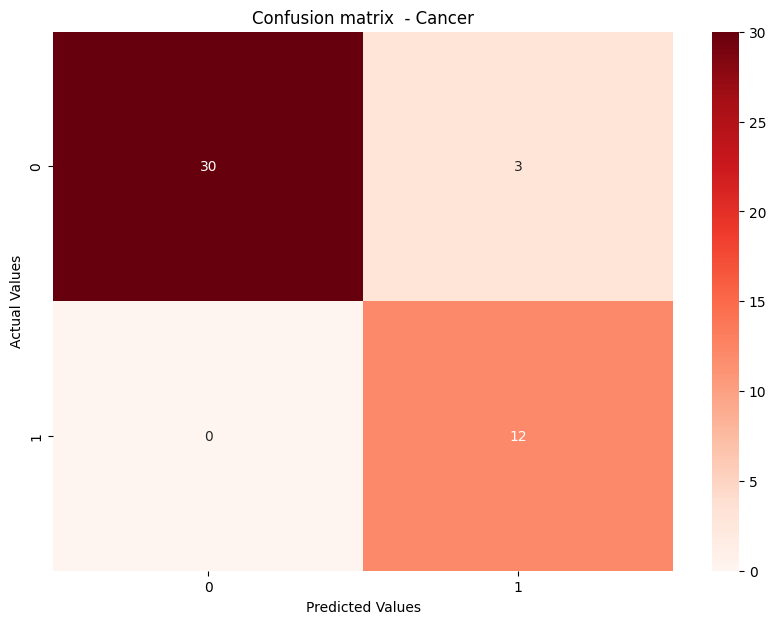

In [141]:
cm = confusion_matrix(y1_test, prediction)
cm
#Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix  - Cancer')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [136]:
from sklearn.metrics import mean_squared_error, classification_report
np.sqrt(mean_squared_error(y1_test, prediction))

np.float64(0.2581988897471611)

In [138]:
# Classification Report for LoR
print(classification_report(y1_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.80      1.00      0.89        12

    accuracy                           0.93        45
   macro avg       0.90      0.95      0.92        45
weighted avg       0.95      0.93      0.94        45



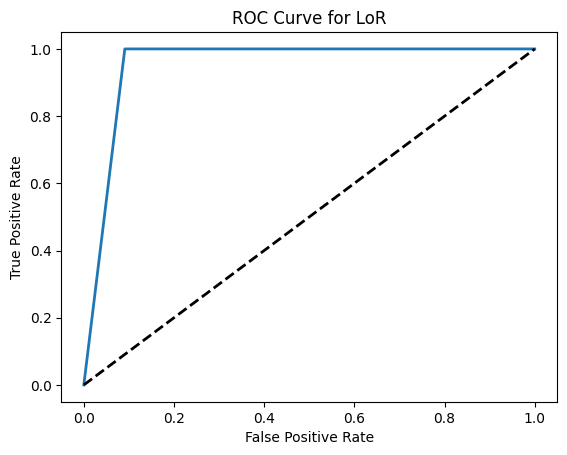

In [139]:
from sklearn.metrics import roc_curve
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for LoR')
    plt.show()
fpr, tpr, t = roc_curve(y1_test, prediction)
plot_roc()